# Carrier Concentration
K. Makulowich September 30, 2020 University of Toronto For technical issues: k.makulowich@mail.utoronto.ca

This module examines how the carrier concentration for intrinsic and extrinsic semiconductors changes with dopant concentration and temperature. This widget is another way to present the information from the following graph. 

![table](L1images/Carr.PNG)

Beginning with the intrinsic case (no added dopants), at non-zero temperatures, electrons (blue circles) are promoted from the valence band (VB, $E_v$) to the conduction band (CB, $E_c$). As electrons are promoted they leave behind holes (blue lines) in the valence band. Holes ($p$) in the valence band and electrons ($n$) in the conduction band can contribute to conduction and are thus known as charge carriers. Since for each electron that is promoted, a hole is created in the valence band, the number of electrons in the CB is equal to the number of holes in the VB.

$n_i = n = p$

Where $n_i$ is the number of intrinsic carriers. The number of intrinsic carriers depends exponentially on temperature, $T$ and the bandgap, $E_G$. Move the temperature slider in the diagram below to view the number of carriers increase - note how $n=p$

$n_i = \sqrt{N_CN_V}exp\left(\frac{-E_G}{2k_BT}\right)$

Intentionally adding dopant atoms complicates the picture. Dopants in extrinsic semiconductors (n-type, p-type) result in impurity energy levels ($E_D$) close to the VB maximum (p-type) or CB minimum (n-type). The proximity of the impurity levels to the CB/VB correlates to the likelihood of impurity atom ionization. At a relatively low temperature ($T< RT$), all impurities are ionized. For n-type semiconductors, donor atoms readily donate electrons (red circles) to the CB. For p-type semiconductors, electrons from the VB are trapped by an acceptor impurity - this effectively injects holes into the VB. 

By intermediate temperatures, all impurities are ionized. At high enough doping concentrations, this leads to more carriers originating from dopant atoms than intrinsically. Visually, there are more red circles than blue circles. At this point, we can make the approximation that the number of total carriers is roughly equal to the concentration of dopants:

$n\approx N_D$ or $p \approx N_A$

Since all dopants have already been ionized, increasing the temperature does not appear to change the carrier concentration - this is the plateau region in the graph above. However, the number of intrinsic carriers does continue to increase with temperature. At a high enough temperature, the number of intrinsic carriers will overtake the number of carriers donated by impurity atoms and total carrier concentration will increase exponentially with temperature. In this stage, the semiconductor has effectively reverted to being intrinsic.

Select your dopant type (p-type, n-type or no dopant) in the yellow box and use the sliders to control dopant concentration and temperature. Electrons are represented as filled circles - their color indicates their origin. Red electrons are from impurity atoms, while blue ones are intrinsic. **There is no way to actually distinguish electrons, the colors are simply meant to provide clarity as to their origin** 


<IPython.core.display.Javascript object>


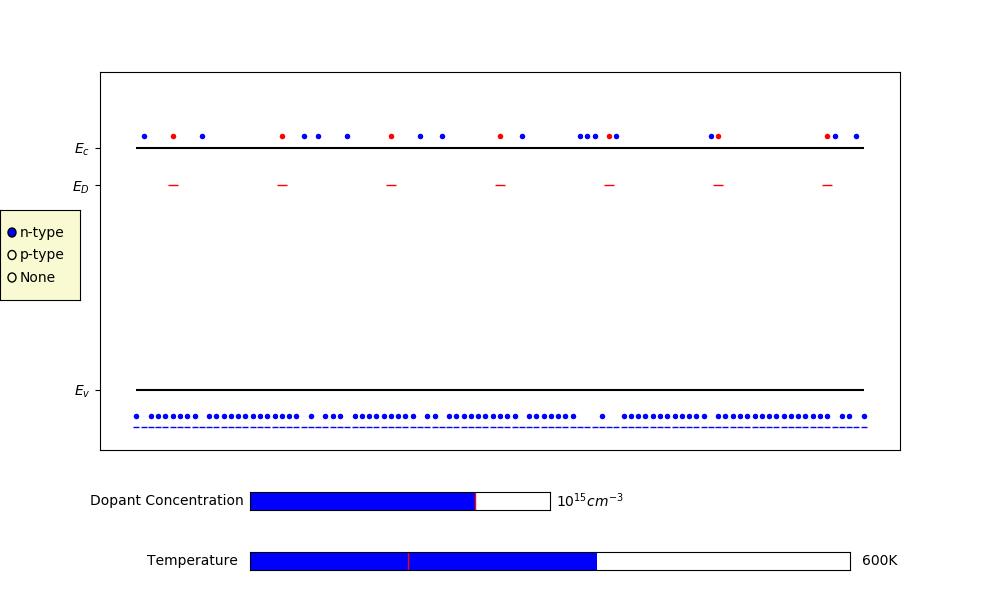

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons


fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)
plt.subplots_adjust(bottom=0.25, left=0.1)

axcolor = 'lightgoldenrodyellow'
axL = plt.axes([0.25, 0.05, 0.60, 0.03])
sL = Slider(axL, 'Temperature', 50, 1000, valinit=300, valstep=50, valfmt='%0.fK', facecolor='blue')


axD = plt.axes([0.25, 0.15, 0.30, 0.03])
sD = Slider(axD, 'Dopant Concentration', 12, 16, valstep=1, valinit=15, valfmt = r'$10^{%0.f} cm^{-3}$', facecolor='blue')

rax = plt.axes([0, 0.5, 0.08, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('n-type', 'p-type', 'None'))


EC = 0.8
EV = 0.16

ECe = EC +0.03
EVh = EV - 0.1
EVe = EV - 0.07
ED = EC -0.1
EA = EV+0.1
EAh = EV+0.12
EDe = EC -0.07
T0 = 300

dopDict = dict(zip(['n-type', 'p-type', 'None'], [ED, EA,1]))

xmin = 0
xmax = 100
xs = np.linspace(xmin, xmax, 101)
Vhs = np.ones(len(xs))*EVh
Ves_z = np.ones(len(xs))*EVe

dopT0 ='n-type'

nD0 = 1e15

def set_dopants(nD,T,dopT,xs, Ves):
    nDtot = 1e16 #max dopant amount
    nDmax = 22 #max number of 'spaces'
    nD = 1e8*nD**.5 #doctor to slow exp. inc

    
    nDamt = int(np.ceil(nD/nDtot*nDmax)) #The number of total dopants
    xDs = np.linspace(xmin+5, xmax-5, nDamt)# x location of dopants
    xDs = xDs +xmax/2 if (nDamt==1) else xDs # if only one put in center of diagram
    
    #Set initial value of dopant level based on type of dopant
    Ds = np.ones(len(xDs))*dopDict[dopT]

    #Calculate number of dopants that are ionized based on Temp
    nDi = (2.82e19*1.83e19)**.5*np.exp(-0.4/(2*8.6e-5*(T+130)))   
    #Translate into actual number in diagram that are excited
    nD_exc =int(np.ceil(nDi/nDtot *len(xDs)))
    nD_exc = nDamt if nD_exc > nDamt else nD_exc
            #Set initial value of dopant es
    
    #For n-type
    if dopT == 'n-type':
        Des = np.ones(len(xDs))*EDe

        a = np.arange(nDamt)
        np.random.shuffle(a)

            #Pick random locations for dopants to be ionized and set to above CB
        Des[a[:nD_exc]] = ECe
        xDes = xDs
    elif dopT =='p-type':
#         #for p-type, more complicated. Keep intrinsic e excited to CB, move e from VB
        
#         #We need to fix Ves
        xs_A = xs[Ves == EVe]
        np.random.shuffle(xs_A)
        ind = [int(i) for i in xs_A[:nD_exc]]
        if len(xs_A) < nD_exc:
            xh = xs[Ves == ECe]
            np.random.shuffle(xh)
            ind = np.append(ind, xh[:(nD_exc-len(xs_A))])
            ind = [int(i) for i in ind]
        Ves[ind] = EAh
        Des = []
        xDes=[]
        xDs[:len(ind)] = ind
        np.random.shuffle(xDs)
    else:
        xDs =[]
        xDes =[]
        Ds =[]
        Des=[]
        
        
    return(xDs, xDes, Ds, Des,Ves)


def set_intrin(V, T):
    #total carrier concentration
    ni_tot = 7.9e16 #cm^-3
    #ni = 2*(2*np.pi*1.38e-23*9.11e-31*(1.08*0.81)**.5/(6.626e-34)**2)**(3/2)*T**(3/2)*1e-6*np.exp(-1.12/(2*8.6e-5*T))
    ni = (2.82e19*1.83e19)**.5*np.exp(-1.12*1.5/(2*8.6e-5*(T+700)))
    exc = int(np.ceil(ni/ni_tot *len(xs)))
    a = np.arange(100)
    np.random.shuffle(a)
    V[a[:exc]] = ECe
    return(V, ni)

Ves0, ni0 = set_intrin(Ves_z.copy(), T0)
xDs0, xDes0, Ds0, Des0, Ves0 = set_dopants(nD0, T0, dopT0, xs, Ves0)

ax1.hlines([EC, EV], xmin, xmax)
Vh_plot, = ax1.plot(xs, Vhs, 'white', linestyle='',marker="_", markersize=5,color='blue')
Ve_plot, = ax1.plot(xs, Ves0, 'white', linestyle='',marker='o',  markerfacecolor='blue', markersize=5)

D_plot, = ax1.plot(xDs0, Ds0, 'white', linestyle='', marker="_", markersize=7, color='red')
De_plot, = ax1.plot(xDes0, Des0, 'white', linestyle='', marker="o", markersize=5, markerfacecolor='red')
ax1.set(ylim=(0,1), yticks =[EV, ED, EC], yticklabels=[r'$E_v$', r'$E_D$', r'$E_c$'], xticks=[])

def update(val):
    T = sL.val
    nD = 10**sD.val
    dopT = radio.value_selected
    if dopT == 'None':
        sD.valtext.set_text('None')
        ax1.set_yticks([EV, EC])
        ax1.set_yticklabels([r'$E_v$', r'$E_c$'])
    else:
        ax1.set_yticks([EV, dopDict[dopT], EC])
        ax1.set_yticklabels([r'$E_v$', r'$E_D$', r'$E_c$'])
        
    Ves, ni = set_intrin(Ves_z.copy(), T)
    xDs, xDes, Ds, Des, Ves = set_dopants(nD,T,dopT, xs, Ves)
    Ve_plot.set_ydata(Ves)
    D_plot.set_data(xDs, Ds)
    De_plot.set_data(xDes, Des)
    fig1.canvas.draw_idle()

sL.on_changed(update)
sD.on_changed(update)
radio.on_clicked(update)
    
plt.show()